In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import warnings
import numpy as np
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('results/sentiment_analysis.csv')

In [3]:
avg_rating = df.groupby(['name'])['rating'].mean()

In [4]:
avg_sentiment = df.groupby(['name']).agg({'sentiment' : lambda x: stats.mode(x)[0]})['sentiment']

In [5]:
grouped_data = pd.DataFrame.from_dict({'avg_rating' : avg_rating, 'avg_sentiment' : avg_sentiment})

In [6]:
positive_ratings = []
negative_ratings = []
positive_sentiment = []
negative_sentiment = []

for i in range(len(avg_rating)):
    if avg_sentiment[i] == 'positive':
        positive_sentiment.append(avg_sentiment[i])
        positive_ratings.append(avg_rating[i])
    elif avg_sentiment[i] == 'negative':
        negative_sentiment.append(avg_sentiment[i])
        negative_ratings.append(avg_rating[i])

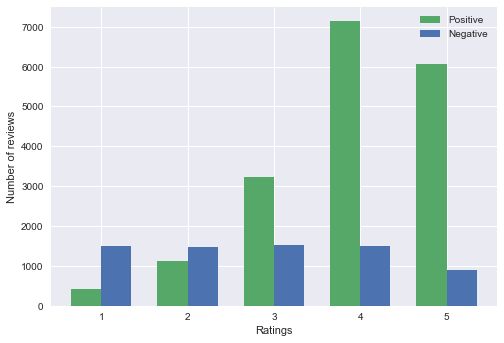

In [7]:
rating_wise = df.groupby(['rating', 'sentiment']).count()
x = []
y = []

for index, rows in rating_wise.reset_index()[['sentiment', 'name']].iterrows():
    if rows[0] == 'negative':
        x.append(rows[1])
    else:
        y.append(rows[1])
rating_wise = rating_wise.reset_index()

ind = np.arange(5)  # the x locations for the groups
width = 0.35

ax = plt.subplot(111)

rects1 = ax.bar(ind, y, width, color='g')
rects2 = ax.bar(ind + width, x, width, color='b')

ax.set_ylabel('Number of reviews')
ax.set_xlabel('Ratings')

ax.legend((rects1[0], rects2[0]), ('Positive', 'Negative'))
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5'))
plt.show()

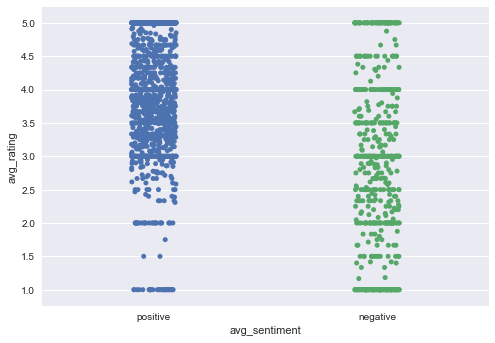

In [8]:
order = ['positive', 'negative']
sns.stripplot(grouped_data["avg_sentiment"],grouped_data['avg_rating'],jitter=True,order=order)

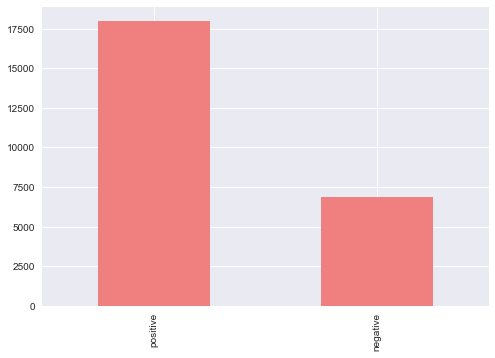

In [9]:
df["sentiment"].value_counts().plot(kind='bar',color='lightcoral')

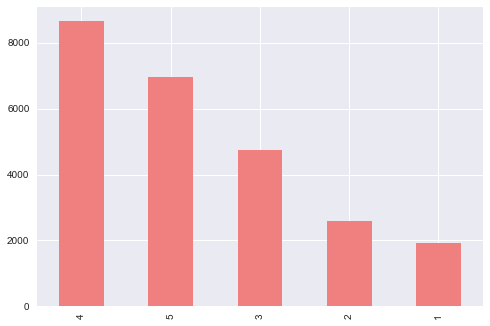

In [10]:
df["rating"].value_counts().plot(kind='bar',color='lightcoral')

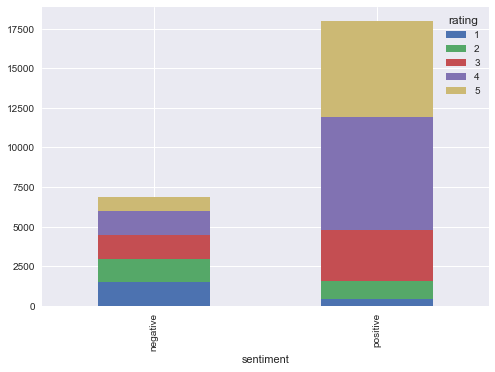

In [11]:
stacked = df.groupby(['sentiment', 'rating'])['name'].count().unstack('rating').fillna(0)
stacked[[1,2,3,4,5]].plot(kind='bar', stacked=True);